# PROV-O Diagram Rendering Example

This example takes a PROV-O activity graph and uses the [PROV Python library](https://pypi.python.org/pypi/prov), which is an implementation of the [Provenance Data Model](http://www.w3.org/TR/prov-dm/) by the World Wide Web Consortium, to create a graphical representations like PNG, SVG, PDF.

## Prerequisites

## Read a simple provenance document

We will use the Example 1 available on https://www.w3.org/TR/prov-o/ e.g. https://www.w3.org/TR/prov-o/#narrative-example-simple-1

To create a provenance document (a package of provenance statements or assertions), import `ProvDocument` class from `prov.model`:

In [1]:
from prov.model import ProvDocument
import prov.model as pm

Create some setup variables filename and basename which will be used for the encoding of the outputs


In [2]:
filename = "https://raw.githubusercontent.com/oznome/jupyter-examples/master/prov/rdf/prov-ex1.ttl"
basename = "prov-ex1"


In [3]:
import urllib.request
url = filename
data = urllib.request.urlopen(url).read()

Use the prov library to deserialize the example document

In [4]:
# Create a new provenance document
d1 = pm.ProvDocument.deserialize(content=data, format="rdf")

## Graphics export (PNG and PDF)

In addition to the PROV-N output (as above), the document can be exported into a graphical representation with the help of the [GraphViz](http://www.graphviz.org/). It is provided as a software package in popular Linux distributions, or can be [downloaded](http://www.graphviz.org/Download.php) for Windows and Mac.

Once you have GraphViz installed and the `dot` command available in your operating system's paths, you can save the document we have so far into a PNG file as follows.

In [5]:
basename

'prov-ex1'

In [6]:
from prov.dot import prov_to_dot
d = prov_to_dot(d1)

In [7]:
from IPython.display import Image, display

def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

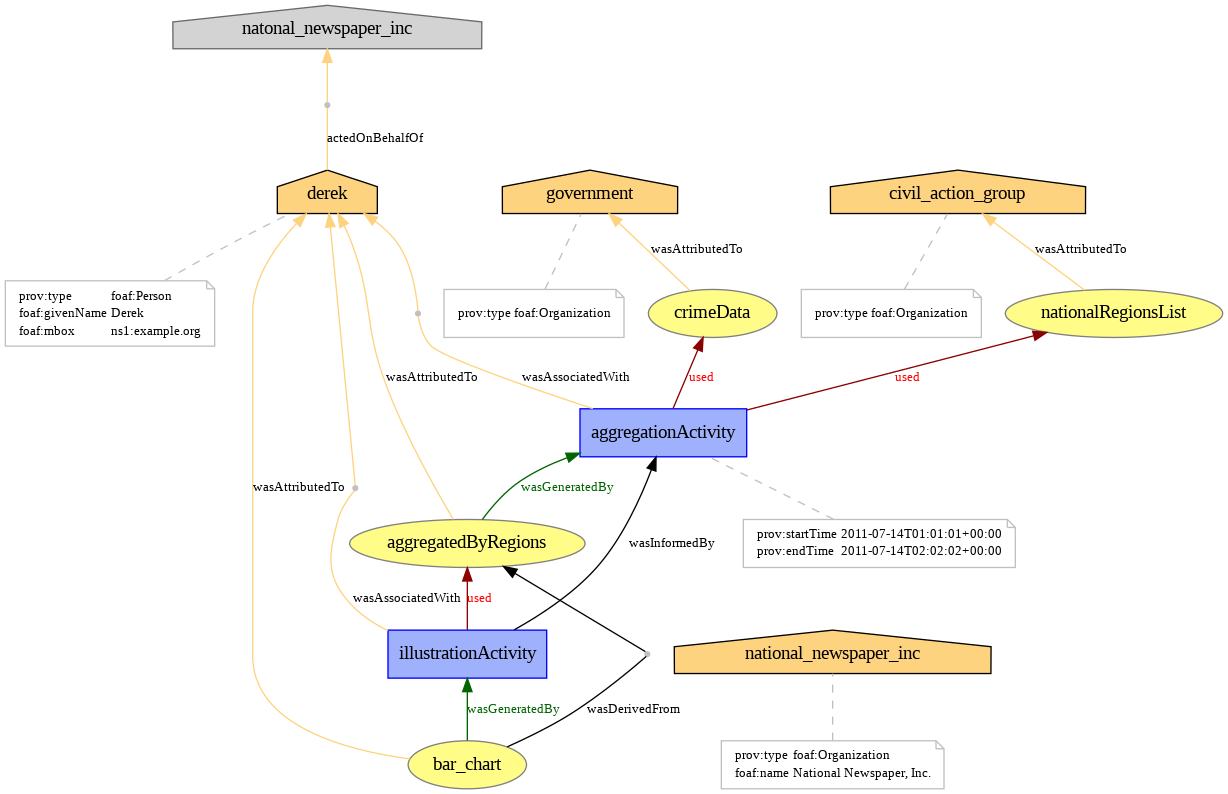

In [8]:
view_pydot(d)

The above saves the PNG file as `article-prov.png` in your current folder. If you're runing this tutorial in Jupyter Notebook, you can see it here as well.

## PROV-JSON export

[PROV-JSON](https://provenance.ecs.soton.ac.uk/prov-json/) is a JSON representation for PROV that was designed for the ease of accessing various PROV elements in a PROV document and to work well with web applications. The format is natively supported by the library and is its default serialisation format.

In [9]:
print(d1.serialize(indent=2))

{
  "prefix": {
    "brick": "https://brickschema.org/schema/Brick#",
    "csvw": "http://www.w3.org/ns/csvw#",
    "dc": "http://purl.org/dc/elements/1.1/",
    "dcat": "http://www.w3.org/ns/dcat#",
    "dcmitype": "http://purl.org/dc/dcmitype/",
    "dcterms": "http://purl.org/dc/terms/",
    "dcam": "http://purl.org/dc/dcam/",
    "doap": "http://usefulinc.com/ns/doap#",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "odrl": "http://www.w3.org/ns/odrl/2/",
    "org": "http://www.w3.org/ns/org#",
    "owl": "http://www.w3.org/2002/07/owl#",
    "prof": "http://www.w3.org/ns/dx/prof/",
    "qb": "http://purl.org/linked-data/cube#",
    "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
    "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
    "schema": "https://schema.org/",
    "sh": "http://www.w3.org/ns/shacl#",
    "skos": "http://www.w3.org/2004/02/skos/core#",
    "sosa": "http://www.w3.org/ns/sosa/",
    "ssn": "http://www.w3.org/ns/ssn/",
    "time": "http://www.w3.org/2006/t

You can also serialize the document directly to a file by providing a filename (below) or a Python File object.

In [10]:
#d1.serialize(basename + '.json')